# Análisis de presupuesto

### Librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Cargando datos iniciales

In [2]:
quotations_raw = pd.read_excel('Quotationds_data.xlsx')

In [3]:
quotations_raw.head(10)

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,precio_unitario,precio,archivo
0,NO INDICADO,CESAREA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),207080166,VILLALOBOS MORERA KATHIA ROCIO,170558.0,PRECIO SALA DE OPERACIONES (60 MINUTOS),NaN,NaN,162240.000,NaN
1,CACERES CHACON ADRIAN,CRANEO SINOSTOSIS CX SUTURECTOMIA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,GRANADOS ESPINOZA FABIANA DANIELA,170153.0,PAQUETE DESCART. INSUMOS,1.0,56500.000,56500.000,NaN
2,ZAFRANI ZEBEDE JACOBO,COLECISTECTOMÍA LAPAROSCÓPICA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,NaN,170381.0,CIRUGIA MENOR,1.0,110100.640,88080.510,NaN
3,ZUÑIGA PEREZ ALBA,HERNIOPLASTIA INGUINAL LAPAROSCOPICA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),112790932,REY SOTO MOISES RAMON,170082.0,PAQUETE DESCART. INSUMOS,1.0,NaN,56500.000,NaN
4,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,INSUMO CASA COMERCIAL,1.0,1.117,1.061,NaN
5,VIQUEZ QUESADA NATHALY YULIANA,HISTERECTOMÍA LAPAROSCÓPICA,NaN,111640275,JOHANNING CORDERO JULIANA,170873.0,CIRUGIA MAYOR,1.0,201455.280,161164.220,NaN
6,ACUÑA NAVAS MARIA JOSE,CESAREA,NaN,304570339,GOMEZ NAVARRO YANIL DEL ROSARIO,152592.0,Parto Normal,1.0,702000.000,NaN,NaN
7,ZAFRANI ZEBEDE JACOBO,COLECISTECTOMÍA LAPAROSCÓPICA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,NaN,170381.0,PRECIO POR MINUTO,60.0,181636.200,145309.200,NaN
8,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,PAQUETE DESCART. INSUMOS,1.0,67800.000,67800.000,NaN
9,NO INDICADO,CESAREA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),207080166,VILLALOBOS MORERA KATHIA ROCIO,170558.0,RECUPERACION 1 HORA (CESAREA),NaN,NaN,104177.000,NaN


In [4]:
quotations_raw.describe()

,invoiceId,Cantidad,precio_unitario,precio
count,115778.000000,116902.000000,7.755500e+04,1.254720e+05
mean,178322.276538,10.832774,1.722102e+05,1.485943e+05
std,4286.989817,36.468260,1.757194e+05,1.579112e+05
min,152592.000000,1.000000,0.000000e+00,0.000000e+00
25%,174586.000000,1.000000,4.257964e+04,3.335349e+04
50%,178402.000000,1.000000,1.105946e+05,8.896160e+04
75%,182078.000000,1.000000,2.678364e+05,2.366910e+05
max,185591.000000,600.000000,4.046130e+06,5.554194e+06


In [5]:
quotations_raw.isna().sum()

Medico               1303
Procedimiento        1472
Convenio            50701
CustomerId          80706
CustomerName        33481
invoiceId           11494
items                  25
Cantidad            10370
precio_unitario     49717
precio               1800
archivo            126680
dtype: int64

In [6]:
quotations_raw[quotations_raw.Medico.isna() & quotations_raw.Procedimiento.isna()]

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,precio_unitario,precio,archivo
1406,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,HCB - HOMBRES MAYORES DE 40 AÑOS - PLAN B,1.0,NaN,242320.0,NaN
1414,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,HCB - PLAN DE ENDOSCOPIAS - A,1.0,NaN,116688.0,NaN
1421,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,ACIDO URICO EMPRESAS,1.0,NaN,0.0,NaN
1430,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,ALIMENTACION CHEQUEOS,1.0,NaN,0.0,NaN
1432,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,CONSULTA DE VALORACIÓN MÉDICO GENERAL,1.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
126237,NaN,NaN,NaN,NaN,RIOS HURTADO DIEGO ANDRES,185333.0,ORINA PARA EMPRESAS,1.0,NaN,0.0,NaN
126286,NaN,NaN,NaN,NaN,RIOS HURTADO DIEGO ANDRES,185333.0,PARQUEO CHEQUEOS (5 HRS),1.0,NaN,0.0,NaN
126293,NaN,NaN,NaN,NaN,RIOS HURTADO DIEGO ANDRES,185333.0,PERFIL LIPIDICO PARA EMPRESAS,1.0,NaN,0.0,NaN
126305,NaN,NaN,NaN,NaN,RIOS HURTADO DIEGO ANDRES,185333.0,TSH PARA EMPRESAS,1.0,NaN,0.0,NaN


In [7]:
quotations_raw[quotations_raw.Procedimiento.isna()]

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,precio_unitario,precio,archivo
1406,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,HCB - HOMBRES MAYORES DE 40 AÑOS - PLAN B,1.0,NaN,242320.0,NaN
1414,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,HCB - PLAN DE ENDOSCOPIAS - A,1.0,NaN,116688.0,NaN
1421,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,ACIDO URICO EMPRESAS,1.0,NaN,0.0,NaN
1430,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,ALIMENTACION CHEQUEOS,1.0,NaN,0.0,NaN
1432,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,CONSULTA DE VALORACIÓN MÉDICO GENERAL,1.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
126237,NaN,NaN,NaN,NaN,RIOS HURTADO DIEGO ANDRES,185333.0,ORINA PARA EMPRESAS,1.0,NaN,0.0,NaN
126286,NaN,NaN,NaN,NaN,RIOS HURTADO DIEGO ANDRES,185333.0,PARQUEO CHEQUEOS (5 HRS),1.0,NaN,0.0,NaN
126293,NaN,NaN,NaN,NaN,RIOS HURTADO DIEGO ANDRES,185333.0,PERFIL LIPIDICO PARA EMPRESAS,1.0,NaN,0.0,NaN
126305,NaN,NaN,NaN,NaN,RIOS HURTADO DIEGO ANDRES,185333.0,TSH PARA EMPRESAS,1.0,NaN,0.0,NaN


In [8]:
quotations_raw[quotations_raw.Procedimiento == 'CESAREA']	

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,precio_unitario,precio,archivo
0,NO INDICADO,CESAREA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),207080166,VILLALOBOS MORERA KATHIA ROCIO,170558.0,PRECIO SALA DE OPERACIONES (60 MINUTOS),NaN,NaN,162240.0,NaN
6,ACUÑA NAVAS MARIA JOSE,CESAREA,NaN,304570339,GOMEZ NAVARRO YANIL DEL ROSARIO,152592.0,Parto Normal,1.0,702000.0,NaN,NaN
9,NO INDICADO,CESAREA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),207080166,VILLALOBOS MORERA KATHIA ROCIO,170558.0,RECUPERACION 1 HORA (CESAREA),NaN,NaN,104177.0,NaN
28,NO INDICADO,CESAREA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),207080166,VILLALOBOS MORERA KATHIA ROCIO,170558.0,HABITACION GINECOOBSTETRICIA,NaN,NaN,385008.0,NaN
33,GIACOMIN CARMIOL LORETTA,CESAREA,CONVENIO: INSTITUTO NACIONAL DE SEGUROS,113280624,MURILLO ARAYA KAROL LISSETH,170616.0,PRECIO POR MINUTO,NaN,NaN,174470.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
127123,REGUEYRA EDELMAN CLAUDIO,CESAREA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,112140112,RODRIGUEZ SOTO NATALIA,185283.0,HABITACION GINECOOBSTETRICIA,NaN,NaN,343620.0,NaN
127158,NO INDICADO,CESAREA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,116170738,MONTES DE OCA UGARTE PRISCILLA ANDREA,185447.0,PRECIO SALA DE OPERACIONES (60 MINUTOS),NaN,NaN,129792.0,NaN
127160,NO INDICADO,CESAREA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,116170738,MONTES DE OCA UGARTE PRISCILLA ANDREA,185447.0,RECUPERACION 1 HORA (CESAREA),NaN,NaN,83341.0,NaN
127163,NO INDICADO,CESAREA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,116170738,MONTES DE OCA UGARTE PRISCILLA ANDREA,185447.0,HABITACION GINECOOBSTETRICIA,NaN,NaN,294531.0,NaN


In [9]:
quotations = (
    quotations_raw
    .dropna(subset = ['Medico', 'Procedimiento'])
    .fillna({'Convenio':'SIN CONVENIO'})
    .assign(Precio=lambda df: df['precio_unitario'].fillna(df['precio']),
                      Descuento_Mi_Vida=lambda df: df['precio'].where(df['precio_unitario'].notna()))
    .dropna(subset=['Precio'])
    .drop(columns=['precio', 'precio_unitario'])
    .dropna(subset = ['items'])
)

In [10]:
quotations.head()

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,archivo,Precio,Descuento_Mi_Vida
0,NO INDICADO,CESAREA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),207080166,VILLALOBOS MORERA KATHIA ROCIO,170558.0,PRECIO SALA DE OPERACIONES (60 MINUTOS),NaN,NaN,162240.000,NaN
1,CACERES CHACON ADRIAN,CRANEO SINOSTOSIS CX SUTURECTOMIA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,GRANADOS ESPINOZA FABIANA DANIELA,170153.0,PAQUETE DESCART. INSUMOS,1.0,NaN,56500.000,56500.000
2,ZAFRANI ZEBEDE JACOBO,COLECISTECTOMÍA LAPAROSCÓPICA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,NaN,170381.0,CIRUGIA MENOR,1.0,NaN,110100.640,88080.510
3,ZUÑIGA PEREZ ALBA,HERNIOPLASTIA INGUINAL LAPAROSCOPICA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),112790932,REY SOTO MOISES RAMON,170082.0,PAQUETE DESCART. INSUMOS,1.0,NaN,56500.000,NaN
4,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,INSUMO CASA COMERCIAL,1.0,NaN,1.117,1.061


In [11]:
quotations.isna().sum()/len(quotations)

Medico               0.000000
Procedimiento        0.000000
Convenio             0.000000
CustomerId           0.635541
CustomerName         0.263751
invoiceId            0.091055
items                0.000000
Cantidad             0.082261
archivo              0.995293
Precio               0.000000
Descuento_Mi_Vida    0.398561
dtype: float64

In [12]:
len(quotations_raw) - len(quotations)

1502

In [13]:
quotations[quotations.CustomerId.isna()]

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,archivo,Precio,Descuento_Mi_Vida
1,CACERES CHACON ADRIAN,CRANEO SINOSTOSIS CX SUTURECTOMIA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,GRANADOS ESPINOZA FABIANA DANIELA,170153.0,PAQUETE DESCART. INSUMOS,1.0,NaN,56500.000,56500.000
2,ZAFRANI ZEBEDE JACOBO,COLECISTECTOMÍA LAPAROSCÓPICA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,NaN,170381.0,CIRUGIA MENOR,1.0,NaN,110100.640,88080.510
4,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,INSUMO CASA COMERCIAL,1.0,NaN,1.117,1.061
7,ZAFRANI ZEBEDE JACOBO,COLECISTECTOMÍA LAPAROSCÓPICA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,NaN,170381.0,PRECIO POR MINUTO,60.0,NaN,181636.200,145309.200
8,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,PAQUETE DESCART. INSUMOS,1.0,NaN,67800.000,67800.000
...,...,...,...,...,...,...,...,...,...,...,...
127267,NO INDICADO,LINGULECTOMÍA IZQUIERDA,SIN CONVENIO,NaN,BALTODANO RAMOS MARIA ZULEMA,185554.0,PROTROMBINA,3.0,NaN,60840.000,42588.000
127268,NO INDICADO,LINGULECTOMÍA IZQUIERDA,SIN CONVENIO,NaN,BALTODANO RAMOS MARIA ZULEMA,185554.0,TROMBOPLASTINA PARCIAL,3.0,NaN,60840.000,42588.000
127269,NO INDICADO,LINGULECTOMÍA IZQUIERDA,SIN CONVENIO,NaN,BALTODANO RAMOS MARIA ZULEMA,185554.0,BIOPSIA C6,1.0,NaN,175519.760,175519.760
127270,NO INDICADO,LINGULECTOMÍA IZQUIERDA,SIN CONVENIO,NaN,BALTODANO RAMOS MARIA ZULEMA,185554.0,ELECTROCARDIOGRAMA HOSPITAL,1.0,NaN,61786.400,46339.800


In [14]:
quotations.columns

Index(['Medico', 'Procedimiento', 'Convenio', 'CustomerId', 'CustomerName',
       'invoiceId', 'items', 'Cantidad', 'archivo', 'Precio',
       'Descuento_Mi_Vida'],
      dtype='object')

In [15]:
medicos = quotations.Medico.unique()

In [16]:
len(medicos)

632

In [17]:
procedimientos = quotations.Procedimiento.unique()
len(procedimientos)

5039

In [18]:
items = quotations['items'].unique()
len(items)

4108

In [19]:
convenios = quotations.Convenio.unique()
len(convenios)

92

In [20]:
quotations.to_csv('presupuestos_totales_sin_agrupar.csv')

In [21]:
quotations.columns

Index(['Medico', 'Procedimiento', 'Convenio', 'CustomerId', 'CustomerName',
       'invoiceId', 'items', 'Cantidad', 'archivo', 'Precio',
       'Descuento_Mi_Vida'],
      dtype='object')

In [22]:
(quotations
 .groupby(['Medico', 'Procedimiento', 'Convenio', 'CustomerId', 'CustomerName', 'invoiceId'])
 .Convenio
 .count()
 )

Medico                     Procedimiento                                                             Convenio                                                           CustomerId   CustomerName                       invoiceId
ABARCA ALVARADO NATALIA    HEMORROIDECTOMÍA                                                          CONVENIO: ASEGURADORA DEL ISTMO (ADISA) S.A                        18620082740  ASEGURADORA DEL ISTMO (ADISA) S.A  171134.0      9
                                                                                                                                                                                     CORZO CALLES HECTOR JOSE           171134.0      6
ABARCA CAMPOS CARLOS LUIS  ARTROSCOPIA DE RODILLA IZQUIERDA + PLASTÍA DE LIGAMENTO CRUZADO ANTERIOR  CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA                           111670874    SOLIS CERDAS HAZEL MARIA           176363.0      9
ABUD SANCHEZ LEONEL        CESAREA                                            

In [23]:
quotations[quotations.CustomerName == 'FERNANDEZ GONZALEZ ALEJANDRO JOSE']

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,archivo,Precio,Descuento_Mi_Vida
1832,BARRENECHEA COTO ALVARO JOSE,ARTROSCOPIA RODILLA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,FERNANDEZ GONZALEZ ALEJANDRO JOSE,171229.0,PAQUETE DESCART. INSUMOS,1.0,NaN,56500.000,NaN
1849,BARRENECHEA COTO ALVARO JOSE,ARTROSCOPIA RODILLA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,FERNANDEZ GONZALEZ ALEJANDRO JOSE,171229.0,USO DE OXIGENO POR HORA,2.0,NaN,8569.600,NaN
1858,BARRENECHEA COTO ALVARO JOSE,ARTROSCOPIA RODILLA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,FERNANDEZ GONZALEZ ALEJANDRO JOSE,171229.0,RECUPERACION PALIG,1.0,NaN,55092.960,NaN
1873,BARRENECHEA COTO ALVARO JOSE,ARTROSCOPIA RODILLA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,FERNANDEZ GONZALEZ ALEJANDRO JOSE,171229.0,CIRUGIA MENOR,1.0,NaN,111358.000,NaN
1876,BARRENECHEA COTO ALVARO JOSE,ARTROSCOPIA RODILLA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,FERNANDEZ GONZALEZ ALEJANDRO JOSE,171229.0,PRECIO POR MINUTO,120.0,NaN,351686.400,NaN
1907,BARRENECHEA COTO ALVARO JOSE,ARTROSCOPIA RODILLA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,FERNANDEZ GONZALEZ ALEJANDRO JOSE,171229.0,INSUMO CASA COMERCIAL,1.0,NaN,1.094,NaN
1914,BARRENECHEA COTO ALVARO JOSE,ARTROSCOPIA RODILLA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,FERNANDEZ GONZALEZ ALEJANDRO JOSE,171229.0,FARMACOS,1.0,NaN,204000.000,NaN
1920,BARRENECHEA COTO ALVARO JOSE,ARTROSCOPIA RODILLA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,FERNANDEZ GONZALEZ ALEJANDRO JOSE,171229.0,SUMINISTROS MEDICOS,1.0,NaN,226000.000,NaN


In [24]:
quotations[quotations['items'] == 'INSUMO CASA COMERCIAL']

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,archivo,Precio,Descuento_Mi_Vida
4,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,INSUMO CASA COMERCIAL,1.0,NaN,1.117,1.061
145,NO INDICADO,REEMPLAZO DE CADERA,SIN CONVENIO,123456789,NaN,169588.0,INSUMO CASA COMERCIAL,1.0,NaN,2.090,1.985
152,JIMENEZ MASIS EDGAR,INSTRUMENTACION LUMBAR,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,301991176,CASTRO ZUÑIGA LUIS ALBERTO,170868.0,INSUMO CASA COMERCIAL,1.0,NaN,4.961,NaN
200,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,INSUMO CASA COMERCIAL,1.0,NaN,1.117,1.061
308,BARRENECHEA COTO ALVARO JOSE,ARTROSCOPIA DE HOMBRO,SIN CONVENIO,NaN,VALENCIA LIDIETH,170968.0,INSUMO CASA COMERCIAL,1.0,NaN,660000.000,627000.000
...,...,...,...,...,...,...,...,...,...,...,...
126931,MORA CASCANTE ALLAN DAVID,RECONSTRUCCIÓN ANTEPIE BILATERAL,CONVENIO: INSTITUTO NACIONAL DE SEGUROS,NaN,CALDERON VALERIN LIGIA MARIA,185362.0,INSUMO CASA COMERCIAL,1.0,NaN,1.540,NaN
126948,GAMBOA SANABRIA ANDRES,DESCOMPRESIÓN CON ARTRODESIS,SIN CONVENIO,NaN,NaN,185576.0,INSUMO CASA COMERCIAL,1.0,NaN,1.480,1.406
127135,BUITRAGO POVEDA CARLOS MAURICIO,SEPTUMPLASTIA +TURBINOPLASTIA + VALVULOPLASTIA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,RODRIGUEZ RAMIREZ ALEJANDRA MAYELA,185395.0,INSUMO CASA COMERCIAL,1.0,NaN,550.000,NaN
127157,MORA CASCANTE ALLAN DAVID,RECONSTRUCCIÓN ANTEPIE,SIN CONVENIO,NaN,MUÑOZ ASTORGA ESTRELLA,185361.0,INSUMO CASA COMERCIAL,1.0,NaN,1.519,1.443


In [25]:
quotations_sin_duplicados = quotations.drop_duplicates()

In [26]:
len(quotations) - len(quotations_sin_duplicados)

18893

In [27]:
len(quotations_sin_duplicados)

106877

In [28]:
len(quotations.invoiceId.unique())

13050

In [29]:
quotations_sin_duplicados[quotations_sin_duplicados.invoiceId == 176477]

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,archivo,Precio,Descuento_Mi_Vida
47050,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,PAQUETE DESCART. INSUMOS,1.0,NaN,56500.00,56500.00
47054,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,OXIGENO X HORAS,2.0,NaN,6240.00,4992.00
47059,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,RECUPERACION 1 HORA,1.0,NaN,107373.76,85899.01
47063,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,PRECIO POR MINUTO,120.0,NaN,366933.60,293546.40
47075,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,CIRUGIA MAYOR,1.0,NaN,203469.76,162775.81
47078,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,RECUPERACIÓN EXTENDIDA,1.0,NaN,312000.00,249600.00
47084,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,"ALEXIS RETRACTOR ""L 9-14CM NVTEC C8403",1.0,NaN,49342.02,41940.72
47112,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,FARMACOS,1.0,NaN,357000.00,303450.00
47116,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,SUMINISTROS MEDICOS,1.0,NaN,395500.00,336175.00
47120,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,SUTURA FILBLOC 3-0 180 17MM 20CM BLOQ FINAL FU...,1.0,NaN,23924.24,20335.60


In [30]:
quotations_sin_duplicados[quotations_sin_duplicados.invoiceId == 176477].Precio.sum()

2249290.38

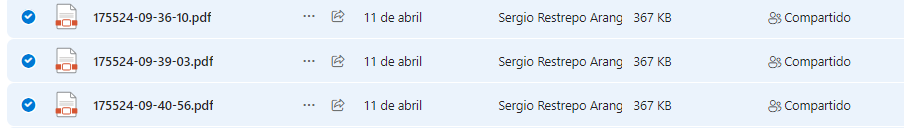

## Parece haber varios presupuestos repetidos en donde cambian algun item entre un presupuesto y el siguiente o cambia el convenio.

In [31]:
quotations[quotations['items'] == 'VOYANT OPEN FUSION DEVICE AP-EB240']

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,archivo,Precio,Descuento_Mi_Vida
5382,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,NaN,NaN,VOYANT OPEN FUSION DEVICE AP-EB240,1.0,NaN,370740.83,315129.71
13026,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,NaN,VOYANT OPEN FUSION DEVICE AP-EB240,1.0,NaN,370740.83,315129.71
38558,CAMPOS CASTRO ALONSO,TIROIDECTOMIA TOTAL,SIN CONVENIO,NaN,NaN,175523.0,VOYANT OPEN FUSION DEVICE AP-EB240,1.0,NaN,371007.00,315355.95
47967,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,VOYANT OPEN FUSION DEVICE AP-EB240,1.0,NaN,371007.00,315355.95
92622,WRIGHT SAMUELS MICHELLE MARIE,HISTERCTOMIA ABDOMINAL TOTAL,SIN CONVENIO,205750264,RAMIREZ ROJAS ROSA LIZETH,181831.0,VOYANT OPEN FUSION DEVICE AP-EB240,1.0,NaN,353343.90,300342.31


In [32]:
quotations[quotations.invoiceId == 175524]

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,archivo,Precio,Descuento_Mi_Vida
39067,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,PAQUETE DESCART. INSUMOS,1.0,NaN,56500.00,NaN
39105,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,DRENAJE JACKSONPRAT 19FR 100ml REDONDO RF11800...,1.0,NaN,40604.41,NaN
39108,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,LIGASURE BLUNT TIP REF LF1637 / LF1837,1.0,NaN,410122.57,NaN
39440,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,SIN CONVENIO,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,PAQUETE DESCART. INSUMOS,1.0,NaN,56500.00,56500.00
39444,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,SIN CONVENIO,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,CIRUGIA MAYOR,1.0,NaN,203469.76,162775.81
39451,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,SIN CONVENIO,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,RECUPERACION 1 HORA,1.0,NaN,107373.76,85899.01
39470,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,SIN CONVENIO,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,OXIGENO X HORAS,4.0,NaN,12480.00,9984.00
39508,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,SIN CONVENIO,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,PRECIO POR MINUTO,240.0,NaN,733867.20,587092.80
39509,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,SIN CONVENIO,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,DRENAJE JACKSONPRAT 19FR 100ml REDONDO RF11800...,1.0,NaN,40604.41,34513.75
39517,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,SIN CONVENIO,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,HAB. CUIDADOS INTERMEDIOS,1.0,NaN,749989.76,562492.32


In [33]:
quotations[quotations.invoiceId == 176477]

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,archivo,Precio,Descuento_Mi_Vida
47050,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,PAQUETE DESCART. INSUMOS,1.0,NaN,56500.00,56500.00
47054,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,OXIGENO X HORAS,2.0,NaN,6240.00,4992.00
47059,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,RECUPERACION 1 HORA,1.0,NaN,107373.76,85899.01
47063,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,PRECIO POR MINUTO,120.0,NaN,366933.60,293546.40
47075,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,CIRUGIA MAYOR,1.0,NaN,203469.76,162775.81
47078,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,RECUPERACIÓN EXTENDIDA,1.0,NaN,312000.00,249600.00
47084,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,"ALEXIS RETRACTOR ""L 9-14CM NVTEC C8403",1.0,NaN,49342.02,41940.72
47112,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,FARMACOS,1.0,NaN,357000.00,303450.00
47116,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,SUMINISTROS MEDICOS,1.0,NaN,395500.00,336175.00
47120,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,SUTURA FILBLOC 3-0 180 17MM 20CM BLOQ FINAL FU...,1.0,NaN,23924.24,20335.60


In [34]:
quotations.head(10)

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,archivo,Precio,Descuento_Mi_Vida
0,NO INDICADO,CESAREA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),207080166,VILLALOBOS MORERA KATHIA ROCIO,170558.0,PRECIO SALA DE OPERACIONES (60 MINUTOS),NaN,NaN,162240.000,NaN
1,CACERES CHACON ADRIAN,CRANEO SINOSTOSIS CX SUTURECTOMIA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,GRANADOS ESPINOZA FABIANA DANIELA,170153.0,PAQUETE DESCART. INSUMOS,1.0,NaN,56500.000,56500.000
2,ZAFRANI ZEBEDE JACOBO,COLECISTECTOMÍA LAPAROSCÓPICA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,NaN,170381.0,CIRUGIA MENOR,1.0,NaN,110100.640,88080.510
3,ZUÑIGA PEREZ ALBA,HERNIOPLASTIA INGUINAL LAPAROSCOPICA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),112790932,REY SOTO MOISES RAMON,170082.0,PAQUETE DESCART. INSUMOS,1.0,NaN,56500.000,NaN
4,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,INSUMO CASA COMERCIAL,1.0,NaN,1.117,1.061
5,VIQUEZ QUESADA NATHALY YULIANA,HISTERECTOMÍA LAPAROSCÓPICA,SIN CONVENIO,111640275,JOHANNING CORDERO JULIANA,170873.0,CIRUGIA MAYOR,1.0,NaN,201455.280,161164.220
6,ACUÑA NAVAS MARIA JOSE,CESAREA,SIN CONVENIO,304570339,GOMEZ NAVARRO YANIL DEL ROSARIO,152592.0,Parto Normal,1.0,NaN,702000.000,NaN
7,ZAFRANI ZEBEDE JACOBO,COLECISTECTOMÍA LAPAROSCÓPICA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,NaN,170381.0,PRECIO POR MINUTO,60.0,NaN,181636.200,145309.200
8,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,PAQUETE DESCART. INSUMOS,1.0,NaN,67800.000,67800.000
9,NO INDICADO,CESAREA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),207080166,VILLALOBOS MORERA KATHIA ROCIO,170558.0,RECUPERACION 1 HORA (CESAREA),NaN,NaN,104177.000,NaN


In [35]:
len(quotations[quotations.invoiceId.isna()].CustomerName.unique())

632

In [36]:
lista_de_presupuestos = quotations.invoiceId.unique()

In [37]:
lista_de_presupuestos.sort()
lista_de_presupuestos

array([152592., 152597., 169588., ..., 185590., 185591.,     nan])

In [38]:
with open('lista_de_presupuestos.txt', 'w') as f:
    for numero in lista_de_presupuestos:
        f.write(f"{numero}\n")

In [39]:
quotations.columns

Index(['Medico', 'Procedimiento', 'Convenio', 'CustomerId', 'CustomerName',
       'invoiceId', 'items', 'Cantidad', 'archivo', 'Precio',
       'Descuento_Mi_Vida'],
      dtype='object')

In [40]:
quotations_raw[quotations_raw.CustomerName == 'GOMEZ NAVARRO YANIL DEL ROSARIO']

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,precio_unitario,precio,archivo
6,ACUÑA NAVAS MARIA JOSE,CESAREA,NaN,304570339,GOMEZ NAVARRO YANIL DEL ROSARIO,152592.0,Parto Normal,1.0,702000.0,NaN,NaN


# Procedimientos

In [41]:
len(quotations.Procedimiento.unique())

5039

In [42]:
len(quotations)

125770

In [43]:
quotations.describe()

,invoiceId,Cantidad,Precio,Descuento_Mi_Vida
count,114318.000000,115424.000000,1.257700e+05,7.564300e+04
mean,178321.813267,10.946675,1.638126e+05,1.496439e+05
std,4290.123057,36.665389,1.711201e+05,1.549690e+05
min,152592.000000,1.000000,0.000000e+00,0.000000e+00
25%,174579.000000,1.000000,3.878264e+04,4.548263e+04
50%,178414.000000,1.000000,1.105946e+05,8.896160e+04
75%,182070.000000,1.000000,2.550000e+05,2.254200e+05
max,185591.000000,600.000000,5.554194e+06,3.843823e+06


In [44]:
(
    quotations
    .groupby('items')
    .Precio
    .mean()
    .sort_values()
    .head(20)
)

items
ELECTRODOS F55 31013926 (UNITARIO)                                                                                                                                                                   0.000
MANGO ELECTROBISTURI MANUAL RF.E2515 (E2350H Tempo                                                                                                                                                   0.000
COBERTOR DE MANUBRIO P/LAMP.CIRUGIA UNITARIO                                                                                                                                                         0.000
Ahorro Mi Vida                                                                                                                                                                                       0.000
JERINGA DESC 5 CC 22 X 1.5 X 1                                                                                                                                                        

In [45]:
quotations[quotations.Procedimiento == "GRASTROSCOPIAS"]

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,archivo,Precio,Descuento_Mi_Vida
24788,NO INDICADO,GRASTROSCOPIAS,CONVENIO: INSTITUTO NACIONAL DE SEGUROS,NaN,QUESADA JIMENEZ JOSE MAURICIO,NaN,PAQUETE INS POLIPEPTOMIA,1.0,NaN,1.01,NaN
26098,NO INDICADO,GRASTROSCOPIAS,CONVENIO: INSTITUTO NACIONAL DE SEGUROS,NaN,QUESADA JIMENEZ JOSE MAURICIO,NaN,PAQUETE INS POLIPEPTOMIA,1.0,NaN,1.01,NaN
26413,NO INDICADO,GRASTROSCOPIAS,CONVENIO: INSTITUTO NACIONAL DE SEGUROS,NaN,QUESADA JIMENEZ JOSE MAURICIO,NaN,PAQUETE INS POLIPEPTOMIA,1.0,NaN,1.01,NaN
28307,NO INDICADO,GRASTROSCOPIAS,CONVENIO: INSTITUTO NACIONAL DE SEGUROS,NaN,QUESADA JIMENEZ JOSE MAURICIO,NaN,PAQUETE INS POLIPEPTOMIA,1.0,NaN,1.01,NaN


In [46]:
quotations.head()

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,archivo,Precio,Descuento_Mi_Vida
0,NO INDICADO,CESAREA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),207080166,VILLALOBOS MORERA KATHIA ROCIO,170558.0,PRECIO SALA DE OPERACIONES (60 MINUTOS),NaN,NaN,162240.000,NaN
1,CACERES CHACON ADRIAN,CRANEO SINOSTOSIS CX SUTURECTOMIA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,GRANADOS ESPINOZA FABIANA DANIELA,170153.0,PAQUETE DESCART. INSUMOS,1.0,NaN,56500.000,56500.000
2,ZAFRANI ZEBEDE JACOBO,COLECISTECTOMÍA LAPAROSCÓPICA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,NaN,170381.0,CIRUGIA MENOR,1.0,NaN,110100.640,88080.510
3,ZUÑIGA PEREZ ALBA,HERNIOPLASTIA INGUINAL LAPAROSCOPICA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),112790932,REY SOTO MOISES RAMON,170082.0,PAQUETE DESCART. INSUMOS,1.0,NaN,56500.000,NaN
4,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,INSUMO CASA COMERCIAL,1.0,NaN,1.117,1.061


In [47]:
(
    quotations
    .groupby(["Medico", "Procedimiento", "Convenio", "CustomerId", "CustomerName", "invoiceId"])
    .agg({
        'Cantidad':'mean',
        'items': 'count'
    })
    .reset_index()
)

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,Cantidad,items
0,ABARCA ALVARADO NATALIA,HEMORROIDECTOMÍA,CONVENIO: ASEGURADORA DEL ISTMO (ADISA) S.A,18620082740,ASEGURADORA DEL ISTMO (ADISA) S.A,171134.0,7.555556,9
1,ABARCA ALVARADO NATALIA,HEMORROIDECTOMÍA,CONVENIO: ASEGURADORA DEL ISTMO (ADISA) S.A,18620082740,CORZO CALLES HECTOR JOSE,171134.0,10.833333,6
2,ABARCA CAMPOS CARLOS LUIS,ARTROSCOPIA DE RODILLA IZQUIERDA + PLASTÍA DE ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,111670874,SOLIS CERDAS HAZEL MARIA,176363.0,11.000000,9
3,ABUD SANCHEZ LEONEL,CESAREA,CONVENIO:,208370244,ESPINOZA BADILLA SIBEYA BRIGETTE,181385.0,NaN,3
4,ABUD SANCHEZ LEONEL,CESAREA,CONVENIO:,703320111,SUAREZ BLANCO ANETH NAOMY,173161.0,NaN,3
...,...,...,...,...,...,...,...,...
5684,ZUÑIGA PEREZ ALBA,LAPAROSCOPICA + EXCISION GRANULOMA UMBILICAL,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,206320871,UGALDE MORALES SHIRLEY FRANCINI,180653.0,10.100000,20
5685,ZUÑIGA PEREZ ALBA,QUISTE PILONIDAL,CONVENIO: INSTITUTO NACIONAL DE SEGUROS,401830988,VILLALOBOS BELLO WALTER GUILLERMO,172473.0,7.285714,7
5686,ZUÑIGA SEQUEIRA TATIANA,HERNIA FEMORAL IZQUIERDA,SIN CONVENIO,108890546,CAMPOS UGALDE EDWIN FELIPE,174427.0,16.000000,16
5687,ZUÑIGA SEQUEIRA TATIANA,RESECCIÓN LIPOMA,SIN CONVENIO,304620899,QUESADA MENDEZ ILEANA CAROLINA,181808.0,8.375000,8


In [48]:
pivot_table = quotations.pivot_table(index=["Medico", "Procedimiento", "Convenio", "CustomerId", "CustomerName", "invoiceId"], 
                                     columns="items", 
                                     values="Cantidad", 
                                     aggfunc='mean')

In [49]:
pivot_table

items                                                                                                                                                                                    17-HYDROXYPROGESTERONA  \
Medico                    Procedimiento                                      Convenio                                           CustomerId  CustomerName                      invoiceId                           
ABARCA ALVARADO NATALIA   HEMORROIDECTOMÍA                                   CONVENIO: ASEGURADORA DEL ISTMO (ADISA) S.A        18620082740 ASEGURADORA DEL ISTMO (ADISA) S.A 171134.0                      NaN   
                                                                                                                                            CORZO CALLES HECTOR JOSE          171134.0                      NaN   
ABARCA CAMPOS CARLOS LUIS ARTROSCOPIA DE RODILLA IZQUIERDA + PLASTÍA DE L... CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA           111670874   SOLIS CERDAS HAZEL MARIA          176363.0                      NaN   
ABUD SANCHEZ LEONEL       CESAREA + CISTECTOMÍA + OOFORECTOMIA UNILATERAL... CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA           113280684   RUIZ ARTAVIA                      171852.0                      NaN   
                          CONO CERVICAL EN FRIO                              CONVENIO: INSTITUTO NACIONAL DE SEGUROS            109820706   HERNANDEZ MURILLO YAZMIN          172398.0                      NaN   
...                                                                                                                                                                                                         ...   
ZUÑIGA PEREZ ALBA         LAPAROSCOPICA + EXCISION GRANULOMA UMBILICAL       CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA ... 206320871   UGALDE MORALES SHIRLEY FRANCINI   180653.0                      NaN   
                          QUISTE PILONIDAL                                   CONVENIO: INSTITUTO NACIONAL DE SEGUROS            401830988   VILLALOBOS BELLO WALTER GUILLERMO 172473.0                      NaN   
ZUÑIGA SEQUEIRA TATIANA   HERNIA FEMORAL IZQUIERDA                           SIN CONVENIO                                       108890546   CAMPOS UGALDE EDWIN FELIPE        174427.0                      NaN   
                          RESECCIÓN LIPOMA                                   SIN CONVENIO                                       304620899   QUESADA MENDEZ ILEANA CAROLINA    181808.0                      NaN   
ZUÑIGA VARGAS JUAN JOSE   OSTEOSONTESIS                                      SIN CONVENIO                                       104000931   SANCHEZ CERDAS LEDA MARIA         178957.0                      NaN   

items                                                                                                                                                                                    2019-NCOV IGG ANTI PROTEÍNA S1, VACUNA COVID  \
Medico                    Procedimiento                                      Convenio                                           CustomerId  CustomerName                      invoiceId                                                 
ABARCA ALVARADO NATALIA   HEMORROIDECTOMÍA                                   CONVENIO: ASEGURADORA DEL ISTMO (ADISA) S.A        18620082740 ASEGURADORA DEL ISTMO (ADISA) S.A 171134.0                                            NaN   
                                                                                                                                            CORZO CALLES HECTOR JOSE          171134.0                                            NaN   
ABARCA CAMPOS CARLOS LUIS ARTROSCOPIA DE RODILLA IZQUIERDA + PLASTÍA DE L... CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA           111670874   SOLIS CERDAS HAZEL MARIA          176363.0                                            NaN   
ABUD SANCHEZ LEONEL       CESAREA + CISTECTOMÍA + OOFORECTOMIA UNILATERAL... CONVENIO: PROG

In [50]:
len(pivot_table)

3052

In [51]:
pivot_table.head()

items                                                                                                                                                                             17-HYDROXYPROGESTERONA  \
Medico                    Procedimiento                                      Convenio                                    CustomerId  CustomerName                      invoiceId                           
ABARCA ALVARADO NATALIA   HEMORROIDECTOMÍA                                   CONVENIO: ASEGURADORA DEL ISTMO (ADISA) S.A 18620082740 ASEGURADORA DEL ISTMO (ADISA) S.A 171134.0                      NaN   
                                                                                                                                     CORZO CALLES HECTOR JOSE          171134.0                      NaN   
ABARCA CAMPOS CARLOS LUIS ARTROSCOPIA DE RODILLA IZQUIERDA + PLASTÍA DE L... CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA    111670874   SOLIS CERDAS HAZEL MARIA          176363.0                      NaN   
ABUD SANCHEZ LEONEL       CESAREA + CISTECTOMÍA + OOFORECTOMIA UNILATERAL... CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA    113280684   RUIZ ARTAVIA                      171852.0                      NaN   
                          CONO CERVICAL EN FRIO                              CONVENIO: INSTITUTO NACIONAL DE SEGUROS     109820706   HERNANDEZ MURILLO YAZMIN          172398.0                      NaN   

items                                                                                                                                                                             2019-NCOV IGG ANTI PROTEÍNA S1, VACUNA COVID  \
Medico                    Procedimiento                                      Convenio                                    CustomerId  CustomerName                      invoiceId                                                 
ABARCA ALVARADO NATALIA   HEMORROIDECTOMÍA                                   CONVENIO: ASEGURADORA DEL ISTMO (ADISA) S.A 18620082740 ASEGURADORA DEL ISTMO (ADISA) S.A 171134.0                                            NaN   
                                                                                                                                     CORZO CALLES HECTOR JOSE          171134.0                                            NaN   
ABARCA CAMPOS CARLOS LUIS ARTROSCOPIA DE RODILLA IZQUIERDA + PLASTÍA DE L... CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA    111670874   SOLIS CERDAS HAZEL MARIA          176363.0                                            NaN   
ABUD SANCHEZ LEONEL       CESAREA + CISTECTOMÍA + OOFORECTOMIA UNILATERAL... CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA    113280684   RUIZ ARTAVIA                      171852.0                                            NaN   
                          CONO CERVICAL EN FRIO                              CONVENIO: INSTITUTO NACIONAL DE SEGUROS     109820706   HERNANDEZ MURILLO YAZMIN          172398.0                                            NaN   

items                                                                                                                                                                             25 OH VITAMINA D  \
Medico                    Procedimiento                                      Convenio                                    CustomerId  CustomerName                      invoiceId                     
ABARCA ALVARADO NATALIA   HEMORROIDECTOMÍA                                   CONVENIO: ASEGURADORA DEL ISTMO (ADISA) S.A 18620082740 ASEGURADORA DEL ISTMO (ADISA) S.A 171134.0                NaN   
                                                                                                                                     CORZO CALLES HECTOR JOSE          171134.0                NaN   
ABARCA CAMPOS CARLOS LUIS ARTROSCOPIA DE RODILLA IZQUIERDA + PLASTÍA DE L... CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA    111670874   SOLIS CERDAS HAZEL MARIA          176363.0                NaN  

In [52]:
pivot_table_from_raw = quotations_raw.pivot_table(index=["Medico", "Procedimiento", "Convenio", "CustomerId", "CustomerName", "invoiceId"], 
                                     columns="items", 
                                     values="Cantidad", 
                                     aggfunc='mean')

In [53]:
len(pivot_table_from_raw)

2006

In [54]:
pivot_table.columns

Index(['17-HYDROXYPROGESTERONA',
       '2019-NCOV IGG ANTI PROTEÍNA S1, VACUNA COVID', '25 OH VITAMINA D',
       '25 OH VITAMINA D Este costo corresponde al examen de Vitamina D',
       '25 OH VITAMINA D Este monto corresponde al examen de Vitamina D',
       '6 HORAS DE HABITACIÓN INTERMEDIOS EDIFICIO CABEZAS', 'A.S.O.',
       'ABINTRA POLVO (ARGININA GLUTAMINA PROTEINA VITAMIN',
       'ABORTO LEGRADO INTRAUTERINO', 'ABRILAR JARABE X 200 ML (HEDERA HELIX)',
       ...
       'ZOLADEX LA 10.8 MG INYECTABLE (GOSERELINA) X 1 medicamento es contra pedido no tenemos en stop para despacho inmediato , requiere receta medica , si no esta afiliada al programa de beneficios mi vida no tomar en cuenta el descuento .',
       'ZOLTUM 20 MG TABLETAS (PANTOPRAZOL) X 14',
       'ZOLTUM 40 MG INYECTABLE (PANTOPRAZOL) X 1',
       'ZYVOX 600 MG/300 ML INYECTABLE 300 ML (LINEZOLID)',
       'ÚTERO HISTERECTOMÍA RADICAL', 'ÚTERO HISTERECTOMÍA TOTAL',
       'ÚTERO HISTERECTOMÍA TOTAL BIOPSIA',
   

In [55]:
pivot_table = pivot_table.reset_index()

In [56]:
pivot_table.head()

items,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,17-HYDROXYPROGESTERONA,"2019-NCOV IGG ANTI PROTEÍNA S1, VACUNA COVID",25 OH VITAMINA D,25 OH VITAMINA D Este costo corresponde al examen de Vitamina D,...,"ZOLADEX LA 10.8 MG INYECTABLE (GOSERELINA) X 1 medicamento es contra pedido no tenemos en stop para despacho inmediato , requiere receta medica , si no esta afiliada al programa de beneficios mi vida no tomar en cuenta el descuento .",ZOLTUM 20 MG TABLETAS (PANTOPRAZOL) X 14,ZOLTUM 40 MG INYECTABLE (PANTOPRAZOL) X 1,ZYVOX 600 MG/300 ML INYECTABLE 300 ML (LINEZOLID),ÚTERO HISTERECTOMÍA RADICAL,ÚTERO HISTERECTOMÍA TOTAL,ÚTERO HISTERECTOMÍA TOTAL BIOPSIA,ÚTERO HISTERECTOMÍA TOTAL Biopsia,ÚTERO LEGRADO INTRAUTERINO,ÚTERO MIOMECTOMÍA
0,ABARCA ALVARADO NATALIA,HEMORROIDECTOMÍA,CONVENIO: ASEGURADORA DEL ISTMO (ADISA) S.A,18620082740,ASEGURADORA DEL ISTMO (ADISA) S.A,171134.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABARCA ALVARADO NATALIA,HEMORROIDECTOMÍA,CONVENIO: ASEGURADORA DEL ISTMO (ADISA) S.A,18620082740,CORZO CALLES HECTOR JOSE,171134.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABARCA CAMPOS CARLOS LUIS,ARTROSCOPIA DE RODILLA IZQUIERDA + PLASTÍA DE ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,111670874,SOLIS CERDAS HAZEL MARIA,176363.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABUD SANCHEZ LEONEL,CESAREA + CISTECTOMÍA + OOFORECTOMIA UNILATERA...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,113280684,RUIZ ARTAVIA,171852.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABUD SANCHEZ LEONEL,CONO CERVICAL EN FRIO,CONVENIO: INSTITUTO NACIONAL DE SEGUROS,109820706,HERNANDEZ MURILLO YAZMIN,172398.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
pivot_table.Convenio.isna().count()

3052

In [58]:
pivot_table.Convenio.value_counts()

Convenio
SIN CONVENIO                                                         1046
CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA                              628
CONVENIO: PUBLICO                                                     542
CONVENIO: INSTITUTO NACIONAL DE SEGUROS                               288
CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA RICA, S.A. (PALIG)     262
CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A                                129
CONVENIO: BEST MERIDIAN INSURANCE COMPANY ( BMI )                      25
CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. - MEDIPROCESOS                 23
CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS)                          18
CONVENIO: ASEGURADORA DEL ISTMO (ADISA) S.A                            12
CONVENIO: CONMIDOCTOR LTDA - SANTA ANA                                 11
CONVENIO: AETNA INTERNACIONAL                                           8
CONVENIO: CIGNA INTERNATIONAL                                           8
CONVENIO: MAPFRE SEGUROS COST

In [59]:
pivot_table['Convenio'] = pivot_table['Convenio'].str.replace("CONVENIO: ", "", regex=False)


In [60]:
pivot_table.Convenio.value_counts()

Convenio
SIN CONVENIO                                               1046
PROGRAMA DE BENEFICIOS MI VIDA                              628
PUBLICO                                                     542
INSTITUTO NACIONAL DE SEGUROS                               288
PAN AMERICAN LIFE INSURANCE DE COSTA RICA, S.A. (PALIG)     262
ASSA COMPAÑÍA DE SEGUROS S.A                                129
BEST MERIDIAN INSURANCE COMPANY ( BMI )                      25
ASSA COMPAÑÍA DE SEGUROS S.A. - MEDIPROCESOS                 23
ASSA COMPAÑÍA DE SEGUROS S.A. (EBS)                          18
ASEGURADORA DEL ISTMO (ADISA) S.A                            12
CONMIDOCTOR LTDA - SANTA ANA                                 11
AETNA INTERNACIONAL                                           8
CIGNA INTERNATIONAL                                           8
MAPFRE SEGUROS COSTA RICA                                     7
DESCUENTO DE RECETA ELECTRONICA                               4
INTERNATIONAL MEDICAL GROUP (IM

In [61]:
pivot_table.columns

Index(['Medico', 'Procedimiento', 'Convenio', 'CustomerId', 'CustomerName',
       'invoiceId', '17-HYDROXYPROGESTERONA',
       '2019-NCOV IGG ANTI PROTEÍNA S1, VACUNA COVID', '25 OH VITAMINA D',
       '25 OH VITAMINA D Este costo corresponde al examen de Vitamina D',
       ...
       'ZOLADEX LA 10.8 MG INYECTABLE (GOSERELINA) X 1 medicamento es contra pedido no tenemos en stop para despacho inmediato , requiere receta medica , si no esta afiliada al programa de beneficios mi vida no tomar en cuenta el descuento .',
       'ZOLTUM 20 MG TABLETAS (PANTOPRAZOL) X 14',
       'ZOLTUM 40 MG INYECTABLE (PANTOPRAZOL) X 1',
       'ZYVOX 600 MG/300 ML INYECTABLE 300 ML (LINEZOLID)',
       'ÚTERO HISTERECTOMÍA RADICAL', 'ÚTERO HISTERECTOMÍA TOTAL',
       'ÚTERO HISTERECTOMÍA TOTAL BIOPSIA',
       'ÚTERO HISTERECTOMÍA TOTAL Biopsia', 'ÚTERO LEGRADO INTRAUTERINO',
       'ÚTERO MIOMECTOMÍA'],
      dtype='object', name='items', length=1876)

# Data preparation

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [63]:
X = pivot_table[['Medico', 'Procedimiento', 'Convenio']]
y = pivot_table.loc[:, '17-HYDROXYPROGESTERONA':]

In [64]:
y.fillna(0, inplace=True)

In [65]:
X.head()

items,Medico,Procedimiento,Convenio
0,ABARCA ALVARADO NATALIA,HEMORROIDECTOMÍA,ASEGURADORA DEL ISTMO (ADISA) S.A
1,ABARCA ALVARADO NATALIA,HEMORROIDECTOMÍA,ASEGURADORA DEL ISTMO (ADISA) S.A
2,ABARCA CAMPOS CARLOS LUIS,ARTROSCOPIA DE RODILLA IZQUIERDA + PLASTÍA DE ...,PROGRAMA DE BENEFICIOS MI VIDA
3,ABUD SANCHEZ LEONEL,CESAREA + CISTECTOMÍA + OOFORECTOMIA UNILATERA...,PROGRAMA DE BENEFICIOS MI VIDA
4,ABUD SANCHEZ LEONEL,CONO CERVICAL EN FRIO,INSTITUTO NACIONAL DE SEGUROS


In [69]:
len(X)

3052

<Axes: ylabel='Medico'>

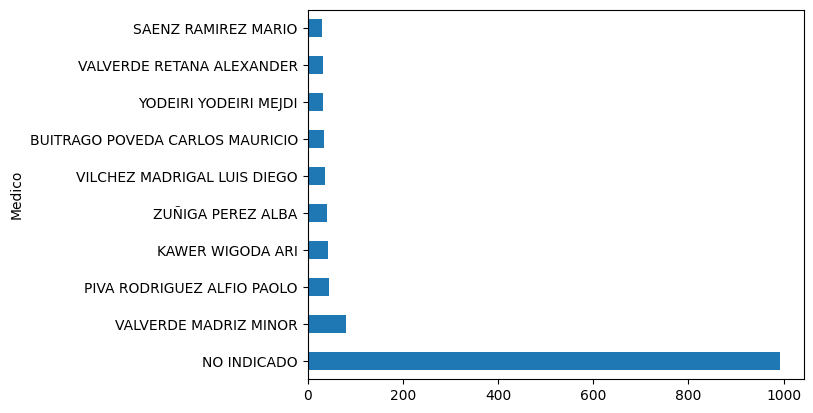

In [66]:
X.Medico.value_counts().sort_values(ascending=False).head(10).plot.barh()

<Axes: ylabel='Convenio'>

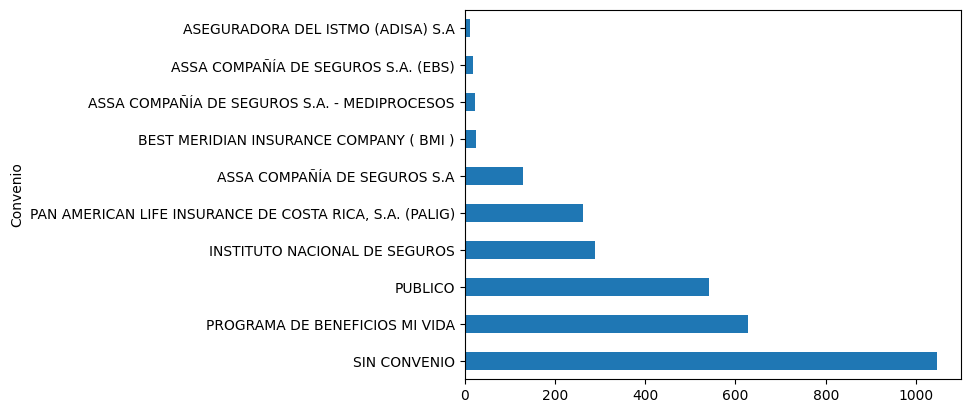

In [67]:
X.Convenio.value_counts().sort_values(ascending=False).head(10).plot.barh()

<Axes: ylabel='Procedimiento'>

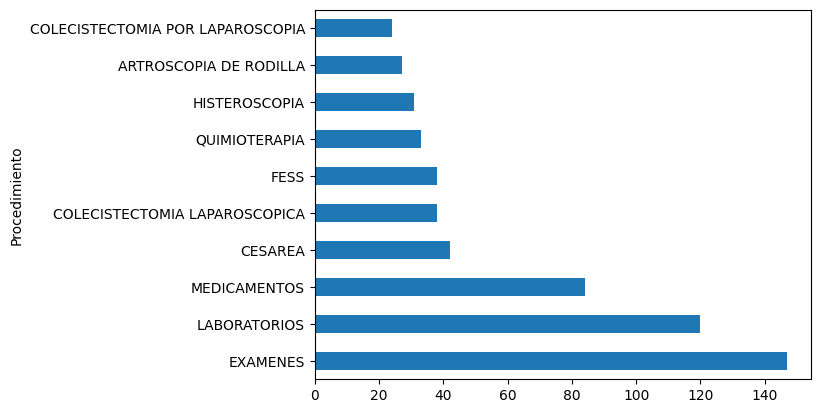

In [68]:
X.Procedimiento.value_counts().sort_values(ascending=False).head(10).plot.barh()

In [74]:
X_encoded = pd.get_dummies(X)

# Modelado

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [76]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

# Performance

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

# Opcional: mostrar algunas predicciones y valores reales para comparación
comparison = pd.DataFrame({'Actual': y_test.iloc[0], 'Predicted': y_pred[0]})
print(comparison)



Mean Squared Error: 1.286622113188228
R^2 Score: -0.5858002362644988
                                                    Actual     Predicted
items                                                                   
17-HYDROXYPROGESTERONA                                 0.0  1.733504e-06
2019-NCOV IGG ANTI PROTEÍNA S1, VACUNA COVID           0.0  1.733504e-06
25 OH VITAMINA D                                       0.0 -1.407200e-05
25 OH VITAMINA D Este costo corresponde al exam...     0.0 -1.024832e-06
25 OH VITAMINA D Este monto corresponde al exam...     0.0  2.614240e-06
...                                                    ...           ...
ÚTERO HISTERECTOMÍA TOTAL                              0.0  3.828551e-04
ÚTERO HISTERECTOMÍA TOTAL BIOPSIA                      0.0 -8.715119e-07
ÚTERO HISTERECTOMÍA TOTAL Biopsia                      0.0  1.645866e-16
ÚTERO LEGRADO INTRAUTERINO                             0.0  1.465552e-06
ÚTERO MIOMECTOMÍA                                      

# Gridsearch para mejorar el modelo

In [79]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9]
}

# Crear el modelo de XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Configurar Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Ejecutar Grid Search
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluar el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
